In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

[0] minimum sample size per bin: 78
64 73 [3.29 3.47]
[1] minimum sample size per bin: 78
59 73 [3.19 3.47]
10 1 4.252154467009631 1.0656022367666107
11 1 3.882130338447501 1.0597230333184464
12 1 3.571367651747992 1.0548112121813913
13 1 3.306681986352252 1.050646106835831
14 1 3.078530716655152 1.047069434913027
[2] minimum sample size per bin: 67
50 71 [3.01 3.43]
5 1 3.7721268605202622 1.129243234657234
6 1 3.190406003934181 1.1082332935251626
[3] minimum sample size per bin: 73
32 84 [2.65 3.69]
2 1 3.874979933704244 1.3103706971044482
5 2 3.2216820872731327 1.2514649491351946
7 3 3.4133608262829767 1.2684342882037154
8 3 3.0504826096427435 1.2365218608121753
9 4 3.5180711118422923 1.2778127834700252
10 4 3.2216820872731327 1.2514649491351946


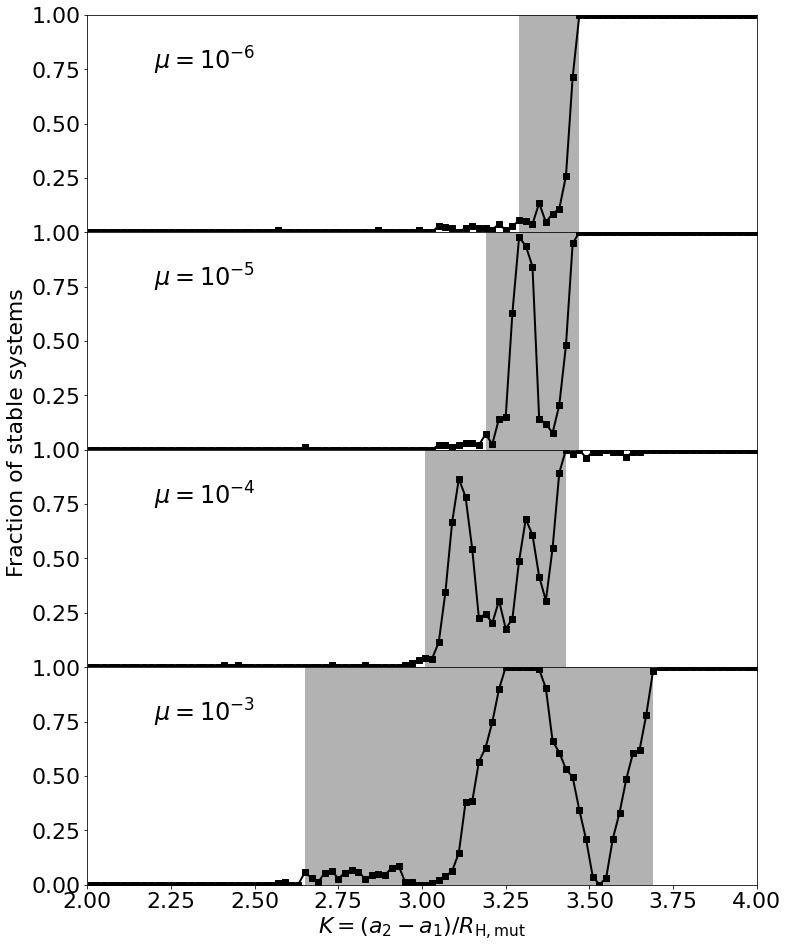

In [2]:
def resonance_to_K(res_val,mu):
    #P1 = 1**(-1.5)
    #P2 = P1*res_val
    a1 = 1. #P1**(2./3.)
    a2 = a1*(res_val)**(2./3.) #P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH, a2

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    #data = np.load('./data/1p/t0-m1e-%1d-new.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2)
    
    dpc = 0.04
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    print(igzmin,igzmax,bins[[igzmin,igzmax]])
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='k',alpha=0.3)
    
    for p in np.arange(20)+1:
        for q in np.arange(1)+1:
            Kres,a2 = resonance_to_K((p+q)/(p),mu)
            #axs[iii].axvline(x=Kres,c='r',ls='--')
            if (Kres>3) and (Kres<4.5):
                print(p,q,Kres,a2)

    for p in np.arange(10)+1:
        for q in np.arange(5)+2:
            Kres,a2 = resonance_to_K((p+q)/(p),mu)
            #axs[iii].axvline(x=Kres,c='b',ls='--')
            if (Kres>3.0) and (Kres<3.6):
                print(p,q,Kres,a2)
                
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])
    axs[iii].text(2.2,0.75,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,4.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-fraction_nf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-fraction_nf-wRH-rev.png',bbox_inches='tight',transparent=True)

[4.12950286 5.02703494] [0.12426291 0.05870226] 2.616161616161616
[5.34309795 3.17315865] [0.15367156 0.0684637 ] 2.595959595959596
[7.34657071 2.29073866] [0.14152381 0.06302879] 2.5353535353535355
[4.87544728 1.66695019] [0.05138825 0.03295077] 2.393939393939394


(2.0, 4.0)

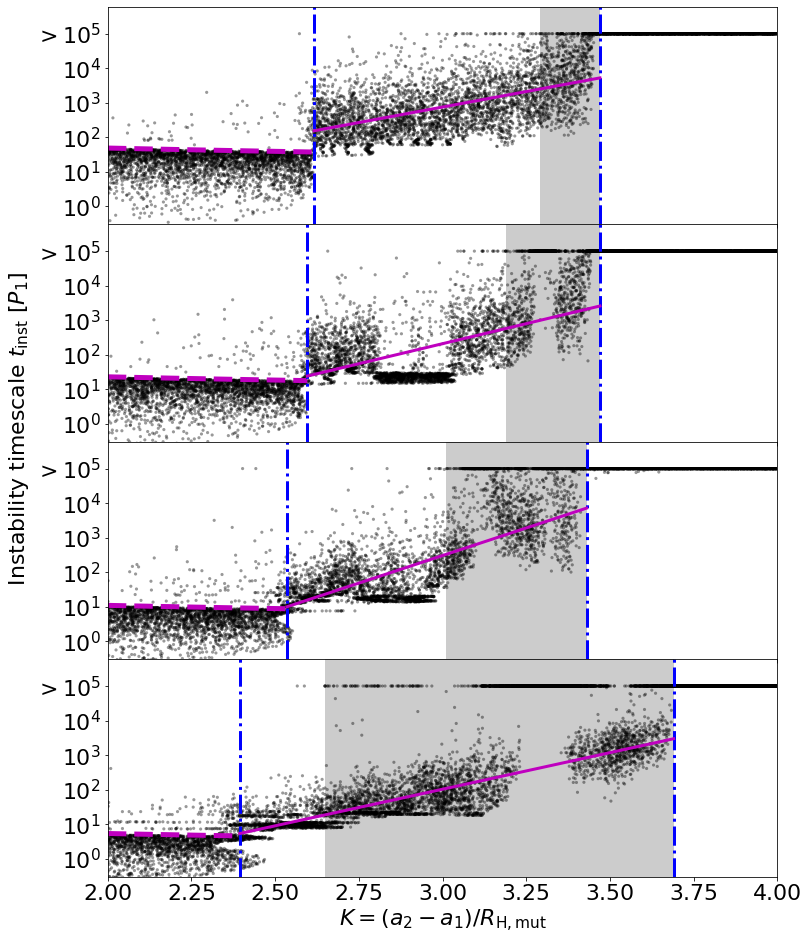

In [3]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn


K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='k',s=10,alpha=0.4,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([3.0e-1,6e5])
    axs[iii].set_yticks([1e0,1e1,1e2,1e3,1e4,1e5])
    axs[iii].set_yticklabels([r'$10^{0}$',r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])
    
    Tsyn = K_to_Tsyn(K,mu)
    Kl = np.linspace(2,4,100)
    Tsynl =  K_to_Tsyn(Kl,mu)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    axs[iii].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    
    K_crit = K_crit_list[iii]
    K_gz = K_gz_list[iii]
    
    axs[iii].axvline(x=Ksyn,c='b',lw=3,ls='-.')
    axs[iii].axvline(x=K_crit,c='b',lw=3,ls='-.')
    axs[iii].fill_between([K_gz,K_crit],[1e-2,1e-2],[1e6,1e6],edgecolor='none',facecolor='k',alpha=0.2)
    
    
    def Tins_fit(K,b,c):
        return b*(K-Ksyn) + c
    
    ind_fit = (K>Ksyn) * (K<K_crit) * (data[:,0]<0.5)
    X_fit = K[ind_fit]
    Y_fit = np.log10(Tinst[ind_fit])
    popt, pcov = curve_fit(Tins_fit, X_fit, Y_fit)
    print(popt*2.3,np.sqrt(np.diag(pcov))*3,Ksyn)
    kk_fit = np.linspace(Ksyn,K_crit,11)
    axs[iii].plot(kk_fit, 10**(Tins_fit(kk_fit, *popt)), color='m', linewidth=3)


    
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1].set_xlim([2.0,4.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-time_nf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-time_nf-wRH-rev.png',bbox_inches='tight',transparent=True)

Ksyn: 2.616161616161616
3.0674052234374676
Ksyn: 2.595959595959596
3.2358304041501245
Ksyn: 2.5353535353535355
3.09017351994669
Ksyn: 2.393939393939394
3.446674067399577


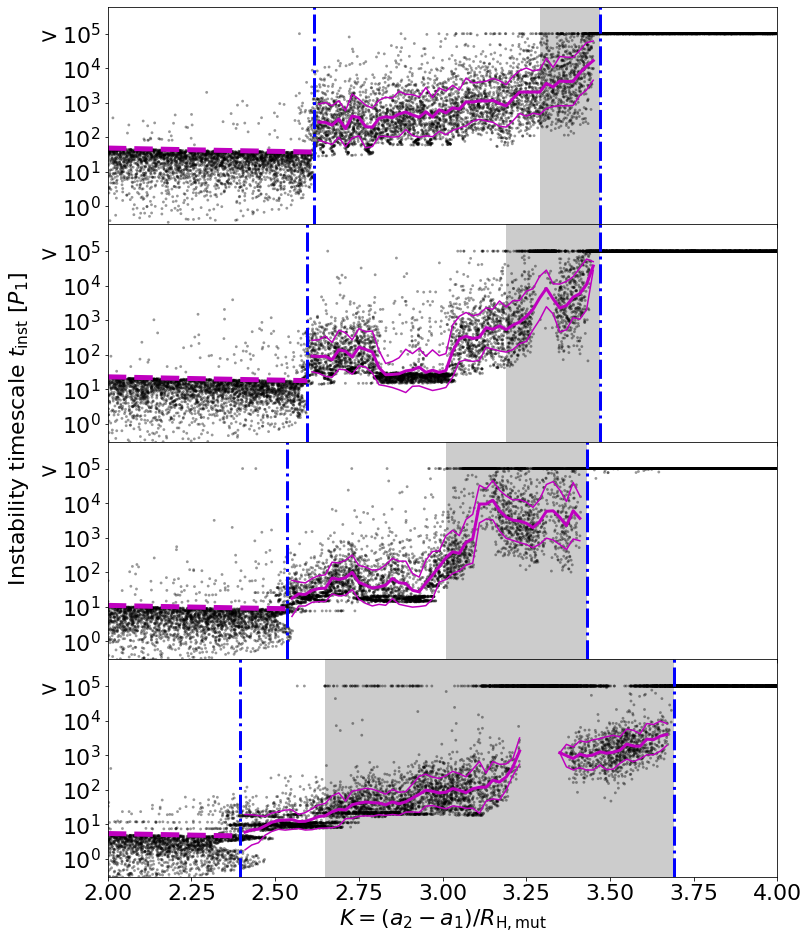

In [4]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn


K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii].scatter(K,Tinst,c='k',s=8,alpha=0.4,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([3.0e-1,6e5])
    axs[iii].set_yticks([1e0,1e1,1e2,1e3,1e4,1e5])
    axs[iii].set_yticklabels([r'$10^{0}$',r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])
    
    Tsyn = K_to_Tsyn(K,mu)
    Kl = np.linspace(2,4,100)
    Tsynl =  K_to_Tsyn(Kl,mu)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
    print('Ksyn:',Ksyn)
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    axs[iii].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    
    K_crit = K_crit_list[iii]
    K_gz = K_gz_list[iii]
    
    axs[iii].axvline(x=Ksyn,c='b',lw=3,ls='-.')
    axs[iii].axvline(x=K_crit,c='b',lw=3,ls='-.')
    axs[iii].fill_between([K_gz,K_crit],[1e-2,1e-2],[1e6,1e6],edgecolor='none',facecolor='k',alpha=0.2)
    
    edges_all = np.linspace(2,4,101)
    edges = edges_all[ (edges_all>Ksyn) * (edges_all<K_crit)]
    Nfit = len(edges)-1
    Kl = np.zeros(Nfit)
    Tl = np.zeros(Nfit)
    dTl = np.zeros(Nfit)
    for i in range(Nfit):
        ind_i = (K>edges[i]) * (K<edges[i+1]) * (data[:,0]<0.5)
        Kl[i] =  0.5*(edges[i]+edges[i+1])
        Tl[i] =  np.mean(np.log10(Tinst[ind_i]))
        dTl[i] = np.std(np.log10(Tinst[ind_i]))
    axs[iii].plot(Kl, 10**(Tl), color='m', linewidth=3)
    axs[iii].plot(Kl, 10**(Tl+dTl), color='m', linewidth=1.5)
    axs[iii].plot(Kl, 10**(Tl-dTl), color='m', linewidth=1.5)
    #axs[iii].fill_between(Kl,10**(Tl-dTl),10**(Tl+dTl),edgecolor='none',facecolor='m',alpha=0.2)
    
    print(np.interp(1e3,10**(Tl),Kl))
    #axs[iii].axvline(x=np.interp(1e3,10**(Tl),Kl))

    
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1].set_xlim([2.0,4.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-time_nf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_nf-wRH-rev.png',bbox_inches='tight',transparent=True)

[0] minimum sample size per bin: 78
64 72 [3.29 3.45]
[1] minimum sample size per bin: 78
59 72 [3.19 3.45]
10 1 4.252154467009631 1.0656022367666107
11 1 3.882130338447501 1.0597230333184464
12 1 3.571367651747992 1.0548112121813913
13 1 3.306681986352252 1.050646106835831
14 1 3.078530716655152 1.047069434913027
[2] minimum sample size per bin: 67
50 70 [3.01 3.41]
5 1 3.7721268605202622 1.129243234657234
6 1 3.190406003934181 1.1082332935251626
[3] minimum sample size per bin: 73
32 83 [2.65 3.67]
2 1 3.874979933704244 1.3103706971044482
5 2 3.2216820872731327 1.2514649491351946
7 3 3.4133608262829767 1.2684342882037154
8 3 3.0504826096427435 1.2365218608121753
9 4 3.5180711118422923 1.2778127834700252
10 4 3.2216820872731327 1.2514649491351946


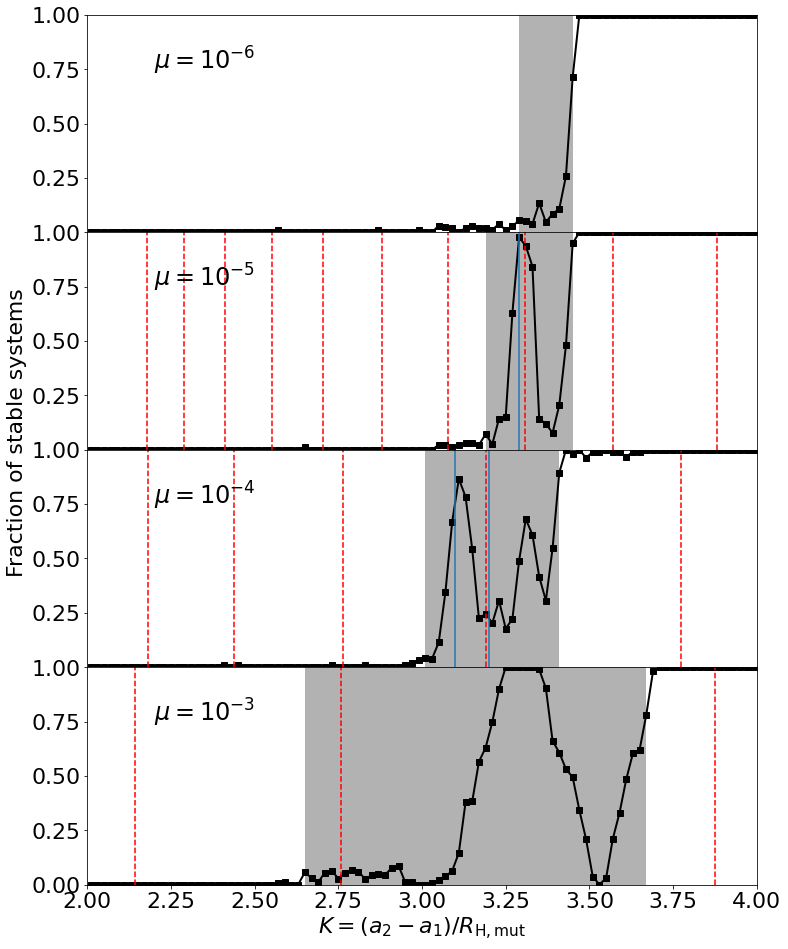

In [5]:
def resonance_to_K(res_val,mu):
    #P1 = 1**(-1.5)
    #P2 = P1*res_val
    a1 = 1. #P1**(2./3.)
    a2 = a1*(res_val)**(2./3.) #P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH, a2

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('./data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    #data = np.load('./data/1p/t0-m1e-%1d-new.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2)
    
    dpc = 0.04
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    print(igzmin,igzmax,bins[[igzmin,igzmax]])
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='k',alpha=0.3)
    
    for p in np.arange(20)+1:
        for q in np.arange(1)+1:
            Kres,a2 = resonance_to_K((p+q)/(p),mu)
            axs[iii].axvline(x=Kres,c='r',ls='--')
            if (Kres>3) and (Kres<4.5):
                print(p,q,Kres,a2)

    for p in np.arange(10)+1:
        for q in np.arange(5)+2:
            Kres,a2 = resonance_to_K((p+q)/(p),mu)
            #axs[iii].axvline(x=Kres,c='b',ls='--')
            if (Kres>3.0) and (Kres<3.6):
                print(p,q,Kres,a2)
                
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])
    axs[iii].text(2.2,0.75,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,4.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

axs[1].axvline(x=3.29)

axs[2].axvline(x=3.1)
axs[2].axvline(x=3.2)